In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('micrsoft_quarter.csv')
df.tail()

,Quarter_Date,Microsoft_Revenue(Millions$US)
59,2006-03-31,10900
60,2005-12-31,11837
61,2005-09-30,9741
62,2005-06-30,10161
63,2005-03-31,9620


In [3]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Microsoft_Revenue(Millions$US)": 'y'})
company_quarter

,ds,y
0,2020-12-31,43076
1,2020-09-30,37154
2,2020-06-30,38033
3,2020-03-31,35021
4,2019-12-31,36906
...,...,...
59,2006-03-31,10900
60,2005-12-31,11837
61,2005-09-30,9741
62,2005-06-30,10161


In [4]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
67,2021-12-31
68,2022-03-31
69,2022-06-30
70,2022-09-30
71,2022-12-31


In [6]:
forecast = model.predict(future)

In [7]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
52,2018-03-31,27631.080902,26131.114587,29107.218760
53,2018-06-30,29297.111623,27711.180161,30846.812024
54,2018-09-30,29265.274309,27646.368849,30776.583343
55,2018-12-31,33327.898623,31850.138179,34742.993050
56,2019-03-31,31602.136175,30042.864291,33007.933125
57,2019-06-30,33212.351336,31751.554764,34776.008375
58,2019-09-30,33242.455032,31838.691079,34738.081244
59,2019-12-31,36900.938388,35330.127196,38217.445056
60,2020-03-31,34748.222030,33210.648613,36179.763596
61,2020-06-30,37519.196287,35947.867843,38966.319208


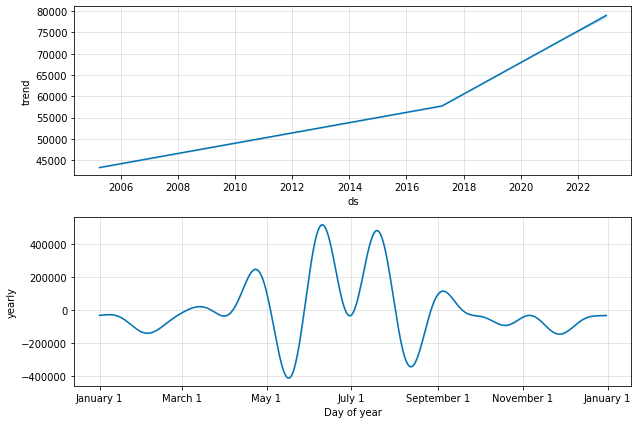

In [8]:

plot2 = model.plot_components(forecast)

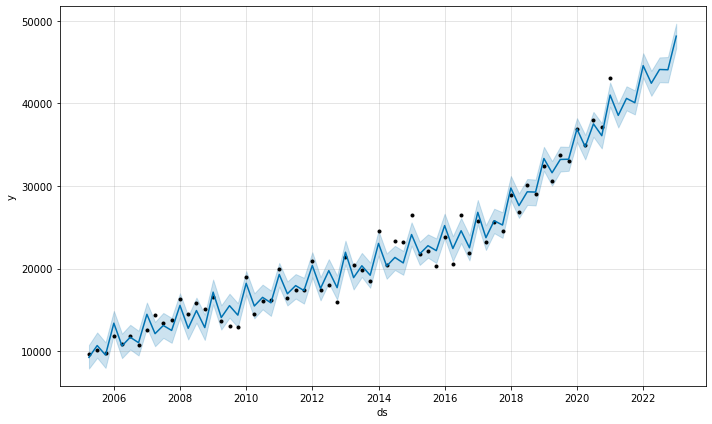

In [9]:

plot1 = model.plot(forecast)